In [1]:
#Mounted the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/human-pose-estimation-opencv-master.zip -d /content/gdrive/MyDrive/Human_Pose

Archive:  /content/gdrive/MyDrive/human-pose-estimation-opencv-master.zip
8f043d9730c086f1d000784afd7fb4a5955c2412
   creating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/
  inflating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/.gitignore  
  inflating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/LICENSE  
  inflating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/README.md  
  inflating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/dance.mp4  
  inflating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/graph_opt.pb  
  inflating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/image.jpg  
  inflating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/image1.jpg  
  inflating: /content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master/image2.jpg  
  inflating: /content/gdrive

In [4]:
import cv2 as cv
import numpy as np
import os
from google.colab.patches import cv2_imshow

In [ ]:
os.rename('/content/gdrive/MyDrive/Human_Pose/human-pose-estimation-opencv-master', '/content/gdrive/MyDrive/Human_Pose/data')

In [5]:
%cd /content/gdrive/MyDrive/Human_Pose/data

/content/gdrive/MyDrive/Human_Pose/data


In [6]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 416
height = 416
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.1

def poseDetector(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()

    return frame

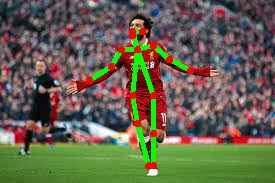

In [7]:
input = cv.imread("/content/gdrive/MyDrive/Human_Pose/data/Human1.jpeg")
output = poseDetector(input)
cv2_imshow(output)

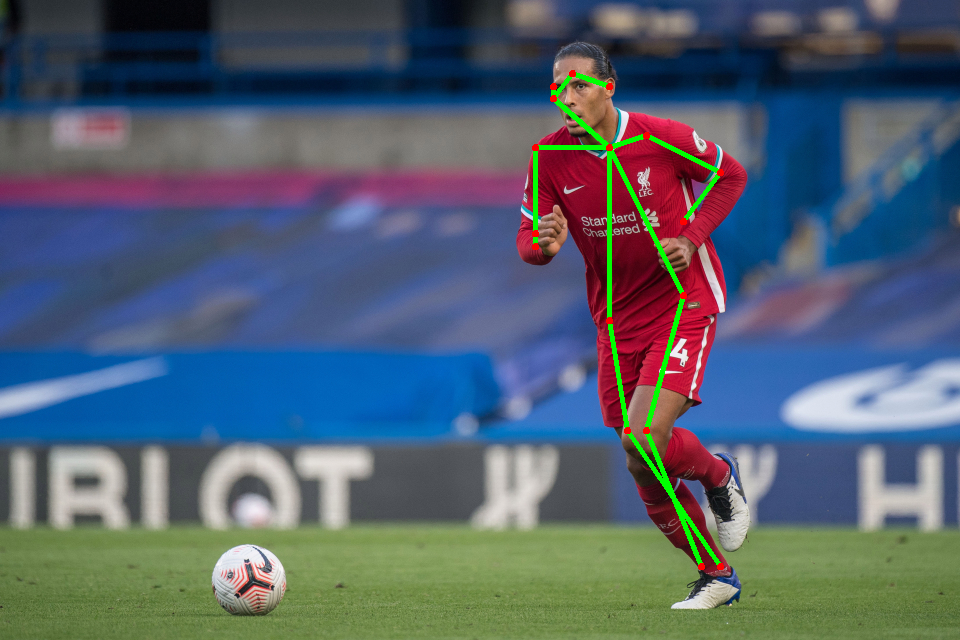

In [8]:
input = cv.imread("/content/gdrive/MyDrive/Human_Pose/data/Human3.jpeg")
output = poseDetector(input)
cv2_imshow(output)

In [12]:
import cv2
cap = cv2.VideoCapture('/content/gdrive/MyDrive/Human_Pose/data/Football Edited Video.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('Main_Output2.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = poseDetector(frame)
  out.write(output)
out.release()
print("Done processing video")

Processing Video...
Done processing video
